In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
weather = pd.read_csv('kyoto_weather.csv')
weather.head()

,Unnamed: 0,Date,Temperature(C),Max_temp,Min_temp,Dew_point,Max_dew_point,Min_dew_point,Pressure,Humidity,Wind,Clouds,Description
0,0,2017-01-01 00:00:00,6,7,4,3.6,4.6,1.6,1028,88,2,75,Clouds
1,1,2017-01-01 01:00:00,7,9,5,4.6,6.6,2.6,1028,88,1,75,Clouds
2,2,2017-01-01 02:00:00,9,10,7,2.0,3.0,0.0,1028,65,1,40,Clouds
3,3,2017-01-01 03:00:00,11,11,10,0.2,0.2,-0.8,1027,46,1,20,Clouds
4,4,2017-01-01 04:00:00,12,12,11,0.6,0.6,-0.4,1026,43,1,20,Clouds


In [3]:
# Assign X (data) and y (target)
predictors = ['Temperature(C)','Dew_point','Pressure','Wind','Clouds']
X = weather[predictors]
y = weather["Description"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.991/0.856
k: 3, Train/Test Score: 0.928/0.856
k: 5, Train/Test Score: 0.906/0.845
k: 7, Train/Test Score: 0.890/0.851
k: 9, Train/Test Score: 0.883/0.852
k: 11, Train/Test Score: 0.880/0.852
k: 13, Train/Test Score: 0.875/0.852
k: 15, Train/Test Score: 0.872/0.852
k: 17, Train/Test Score: 0.872/0.851
k: 19, Train/Test Score: 0.869/0.849


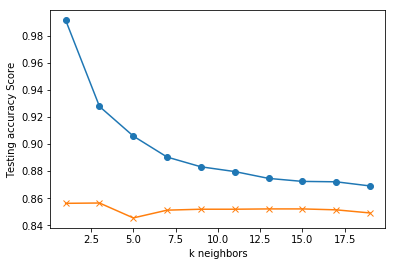

In [5]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [7]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.856
